## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles, make_moons, make_swiss_roll, load_digits
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

## 2. Load and Prepare Datasets

In [2]:
# Dataset 1: Circles (Non-linear, 2 classes)
X_circles, y_circles = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)

# Dataset 2: Moons (Non-linear, 2 classes)
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Dataset 3: Swiss Roll (3D manifold)
X_swiss, y_swiss = make_swiss_roll(n_samples=1500, noise=0.1, random_state=42)

# Dataset 4: Digits (Real-world, 10 classes)
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

# Standardize all datasets
scaler = StandardScaler()
X_circles = scaler.fit_transform(X_circles)
X_moons = scaler.fit_transform(X_moons)
X_swiss = scaler.fit_transform(X_swiss)
X_digits = scaler.fit_transform(X_digits)

print("Datasets loaded:")
print(f"1. Circles: {X_circles.shape}")
print(f"2. Moons: {X_moons.shape}")
print(f"3. Swiss Roll: {X_swiss.shape}")
print(f"4. Digits: {X_digits.shape}")

Datasets loaded:
1. Circles: (1000, 2)
2. Moons: (1000, 2)
3. Swiss Roll: (1500, 3)
4. Digits: (1797, 64)


## 3. Helper Functions

In [3]:
def apply_dimensionality_reduction(X, y, method='pca', **kwargs):
    """
    Apply dimensionality reduction method
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
    y : array-like, shape (n_samples,)
    method : str, 'pca', 'kernel_pca', or 'tsne'
    **kwargs : additional parameters for the method
    
    Returns:
    --------
    X_reduced : array-like, shape (n_samples, 2)
    """
    if method == 'pca':
        model = PCA(n_components=2, random_state=42)
    elif method == 'kernel_pca':
        model = KernelPCA(n_components=2, kernel='rbf', gamma=kwargs.get('gamma', None), random_state=42)
    elif method == 'tsne':
        model = TSNE(n_components=2, random_state=kwargs.get('random_state', 42), 
                     perplexity=kwargs.get('perplexity', 30), max_iter=1000)
    else:
        raise ValueError(f"Unknown method: {method}")
    
    X_reduced = model.fit_transform(X)
    return X_reduced

def plot_reduction(ax, X_reduced, y, title, cmap='tab10'):
    """
    Plot dimensionality reduction result
    """
    scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], 
                        c=y, cmap=cmap, s=20, alpha=0.7, edgecolors='k', linewidth=0.5)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.grid(True, alpha=0.3)
    return scatter

## 4. Visualize Original Datasets

Before applying dimensionality reduction, let's visualize the raw datasets

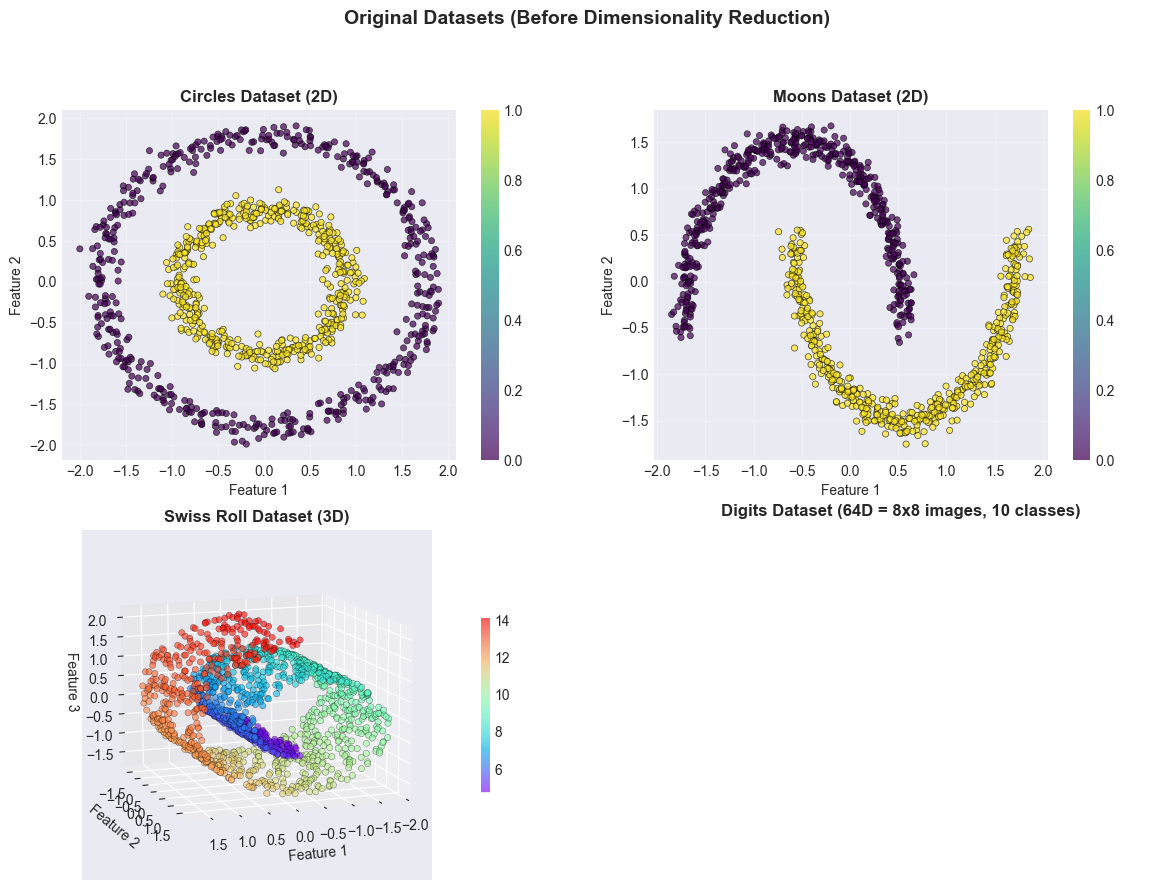

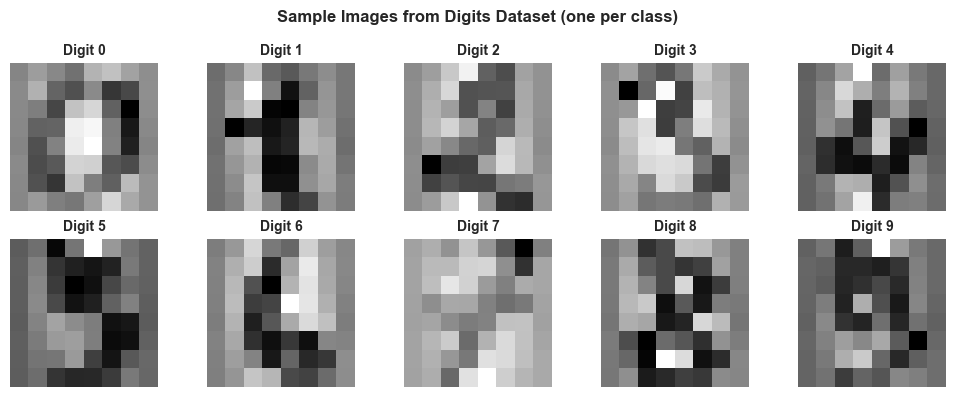

<Figure size 640x480 with 0 Axes>

Dataset Characteristics:
1. Circles:    (1000, 2) - Non-linear, 2 classes
2. Moons:      (1000, 2) - Non-linear, 2 classes
3. Swiss Roll: (1500, 3) - 3D manifold, continuous
4. Digits:     (1797, 64) - High-dimensional, 10 classes


In [4]:
# Visualize original datasets
fig = plt.figure(figsize=(14, 10))
fig.suptitle('Original Datasets (Before Dimensionality Reduction)', 
             fontsize=14, fontweight='bold')

# Dataset 1: Circles (2D)
ax = plt.subplot(2, 2, 1)
scatter = ax.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='viridis', 
                    s=20, alpha=0.7, edgecolors='k', linewidth=0.5)
ax.set_title('Circles Dataset (2D)', fontsize=12, fontweight='bold')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax)

# Dataset 2: Moons (2D)
ax = plt.subplot(2, 2, 2)
scatter = ax.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', 
                    s=20, alpha=0.7, edgecolors='k', linewidth=0.5)
ax.set_title('Moons Dataset (2D)', fontsize=12, fontweight='bold')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax)

# Dataset 3: Swiss Roll (3D - TRUE 3D visualization)
ax = plt.subplot(2, 2, 3, projection='3d')
scatter = ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], 
                    c=y_swiss, cmap='rainbow', s=20, alpha=0.6, edgecolors='k', linewidth=0.3)
ax.set_title('Swiss Roll Dataset (3D)', fontsize=12, fontweight='bold')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.view_init(elev=12, azim=70)
plt.colorbar(scatter, ax=ax, shrink=0.5, pad=0.1)

# Dataset 4: Digits (64D - show sample images in a grid)
ax = plt.subplot(2, 2, 4)
ax.axis('off')
ax.set_title('Digits Dataset (64D = 8x8 images, 10 classes)', fontsize=12, fontweight='bold', pad=10)

# Create a 2x5 grid showing one sample per digit class
fig_grid = plt.figure(figsize=(10, 4))
for digit in range(10):
    # Get first sample of this digit
    digit_idx = np.where(y_digits == digit)[0][0]
    
    # Create subplot in 2x5 grid
    ax_digit = fig_grid.add_subplot(2, 5, digit + 1)
    ax_digit.imshow(X_digits[digit_idx].reshape(8, 8), cmap='gray_r', interpolation='nearest')
    ax_digit.set_title(f'Digit {digit}', fontsize=10, fontweight='bold')
    ax_digit.axis('off')

fig_grid.suptitle('Sample Images from Digits Dataset (one per class)', fontsize=12, fontweight='bold')
fig_grid.tight_layout()
plt.show()

plt.figure(fig.number)
plt.tight_layout()
plt.show()

print("Dataset Characteristics:")
print("="*50)
print(f"1. Circles:    {X_circles.shape} - Non-linear, 2 classes")
print(f"2. Moons:      {X_moons.shape} - Non-linear, 2 classes")
print(f"3. Swiss Roll: {X_swiss.shape} - 3D manifold, continuous")
print(f"4. Digits:     {X_digits.shape} - High-dimensional, 10 classes")

## 5. Experiment 1: Compare All Methods on Each Dataset

Apply **3 models** (PCA, Kernel PCA, t-SNE) to each dataset separately

### 5.1 Circles Dataset

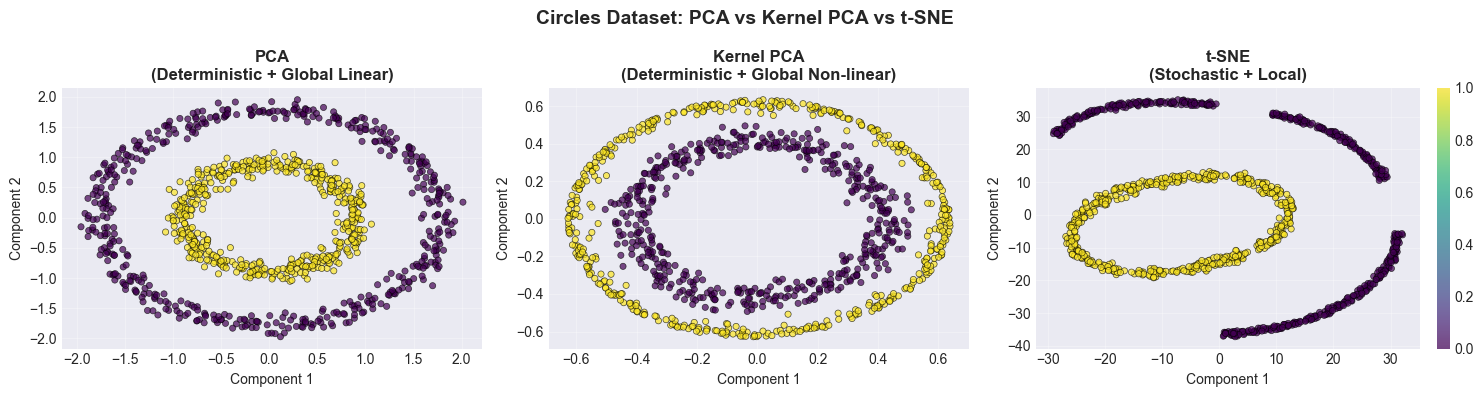

In [5]:
# Circles Dataset
methods = ['pca', 'kernel_pca', 'tsne']
method_names = ['PCA\n(Deterministic + Global Linear)', 
                'Kernel PCA\n(Deterministic + Global Non-linear)', 
                't-SNE\n(Stochastic + Local)']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Circles Dataset: PCA vs Kernel PCA vs t-SNE', 
             fontsize=14, fontweight='bold')

for j, (method, method_name) in enumerate(zip(methods, method_names)):
    if method == 'kernel_pca':
        X_reduced = apply_dimensionality_reduction(X_circles, y_circles, method, gamma=1.0)
    else:
        X_reduced = apply_dimensionality_reduction(X_circles, y_circles, method)
    
    scatter = plot_reduction(axes[j], X_reduced, y_circles, method_name, cmap='viridis')
    
    if j == 2:
        plt.colorbar(scatter, ax=axes[j], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

### 5.2 Moons Dataset

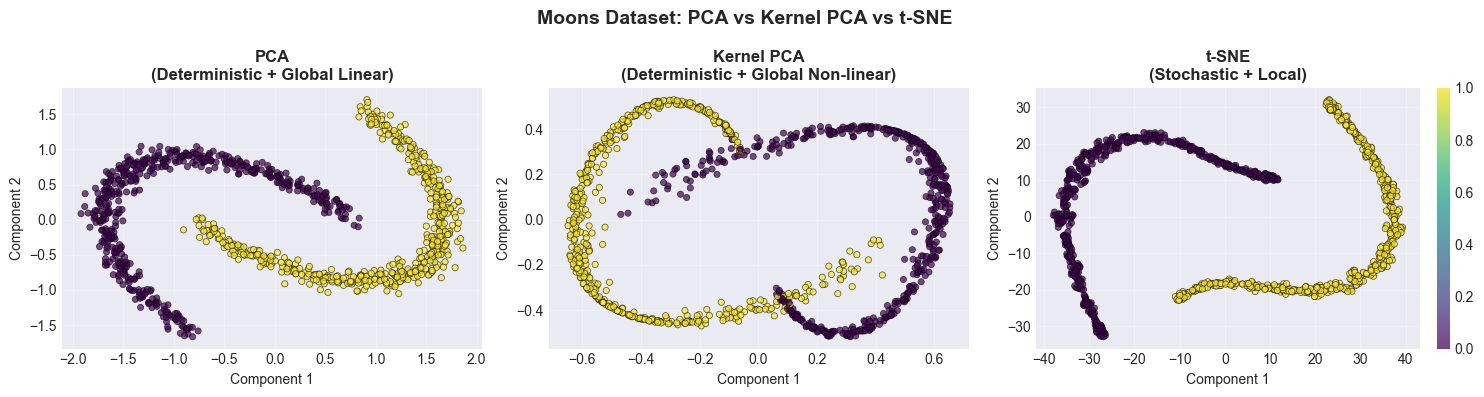

In [6]:
# Moons Dataset
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Moons Dataset: PCA vs Kernel PCA vs t-SNE', 
             fontsize=14, fontweight='bold')

for j, (method, method_name) in enumerate(zip(methods, method_names)):
    
    if method == 'kernel_pca':
        X_reduced = apply_dimensionality_reduction(X_moons, y_moons, method, gamma=1.0)
    else:
        X_reduced = apply_dimensionality_reduction(X_moons, y_moons, method)
    
    scatter = plot_reduction(axes[j], X_reduced, y_moons, method_name, cmap='viridis')
    
    if j == 2:
        plt.colorbar(scatter, ax=axes[j], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

### 5.3 Swiss Roll Dataset

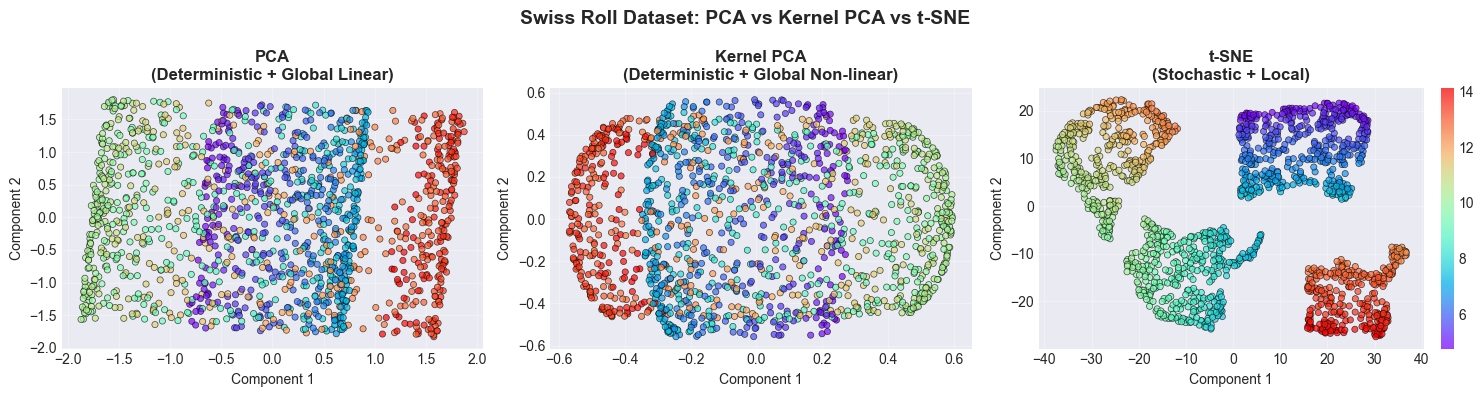

In [7]:
# Swiss Roll Dataset
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Swiss Roll Dataset: PCA vs Kernel PCA vs t-SNE', 
             fontsize=14, fontweight='bold')

for j, (method, method_name) in enumerate(zip(methods, method_names)):
    if method == 'kernel_pca':
        X_reduced = apply_dimensionality_reduction(X_swiss, y_swiss, method, gamma=0.1)
    elif method == 'tsne':
        X_reduced = apply_dimensionality_reduction(X_swiss, y_swiss, method, perplexity=50)
    else:
        X_reduced = apply_dimensionality_reduction(X_swiss, y_swiss, method)
    
    scatter = plot_reduction(axes[j], X_reduced, y_swiss, method_name, cmap='rainbow')
    
    if j == 2:
        plt.colorbar(scatter, ax=axes[j], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

### 5.4 Digits Dataset

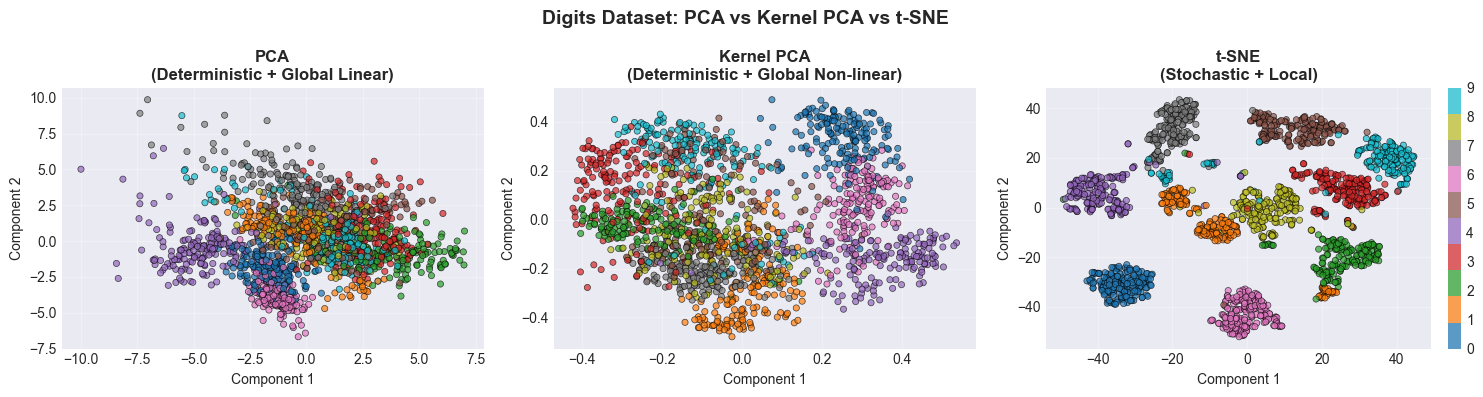

In [8]:
# Digits Dataset
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Digits Dataset: PCA vs Kernel PCA vs t-SNE', 
             fontsize=14, fontweight='bold')

for j, (method, method_name) in enumerate(zip(methods, method_names)):
    if method == 'kernel_pca':
        X_reduced = apply_dimensionality_reduction(X_digits, y_digits, method, gamma=0.01)
    else:
        X_reduced = apply_dimensionality_reduction(X_digits, y_digits, method)
    
    scatter = plot_reduction(axes[j], X_reduced, y_digits, method_name, cmap='tab10')
    
    if j == 2:
        plt.colorbar(scatter, ax=axes[j], fraction=0.046, pad=0.04, ticks=range(10))

plt.tight_layout()
plt.show()


## 6. Experiment 2: Demonstrate Stochastic Nature of t-SNE

Run t-SNE **multiple times** with different initialization to show stochastic behavior.

**Note**: t-SNE's randomness comes from random initialization. Different `random_state` values lead to different initializations and potentially different local minima.

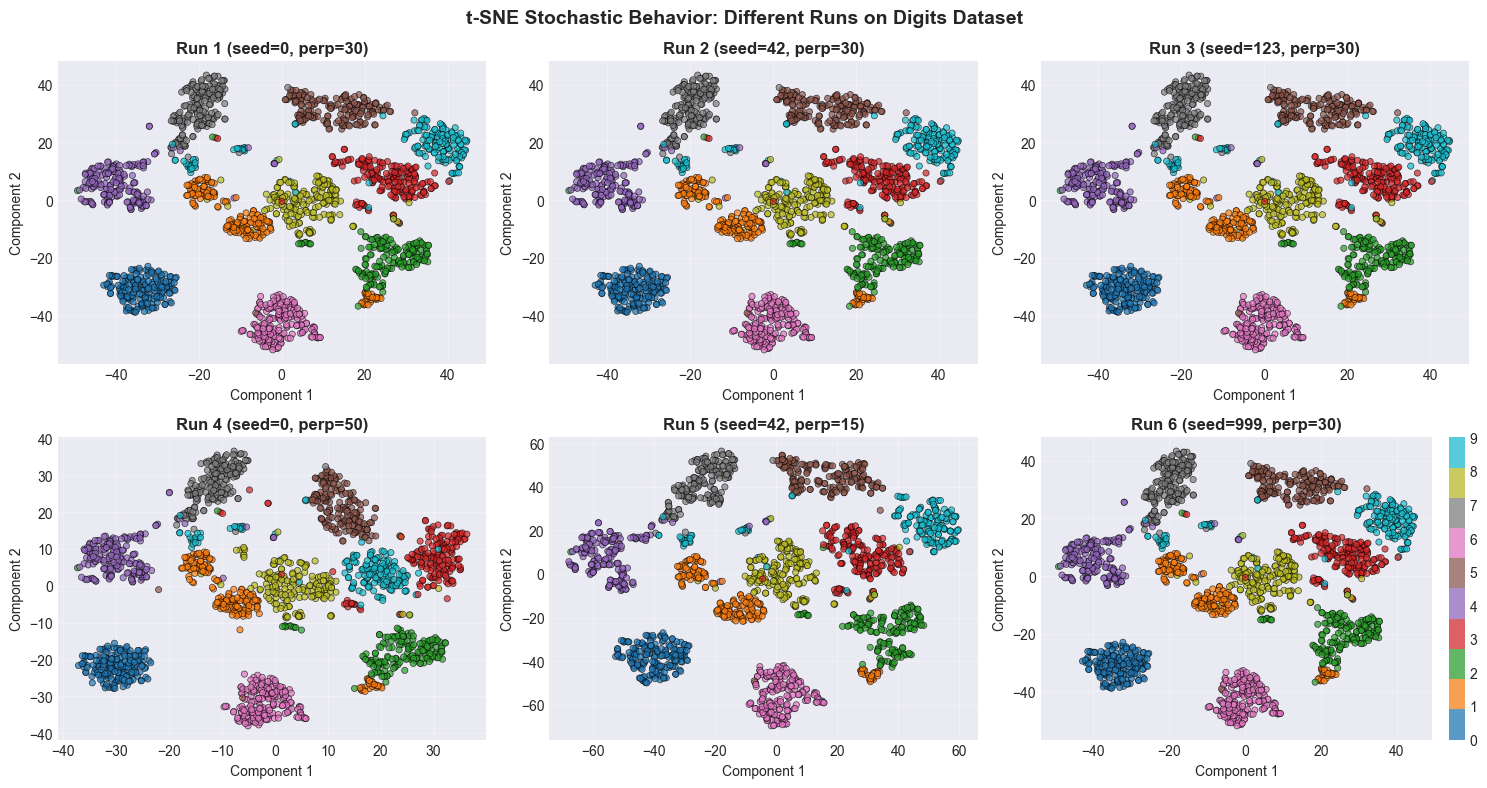

In [9]:
# Demonstrate stochastic nature with different parameters and random states
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('t-SNE Stochastic Behavior: Different Runs on Digits Dataset', 
             fontsize=14, fontweight='bold')

# Different configurations to show variation
configs = [
    {'random_state': 0, 'perplexity': 30, 'label': 'Run 1 (seed=0, perp=30)'},
    {'random_state': 42, 'perplexity': 30, 'label': 'Run 2 (seed=42, perp=30)'},
    {'random_state': 123, 'perplexity': 30, 'label': 'Run 3 (seed=123, perp=30)'},
    {'random_state': 0, 'perplexity': 50, 'label': 'Run 4 (seed=0, perp=50)'},
    {'random_state': 42, 'perplexity': 15, 'label': 'Run 5 (seed=42, perp=15)'},
    {'random_state': 999, 'perplexity': 30, 'label': 'Run 6 (seed=999, perp=30)'},
]

for idx, config in enumerate(configs):
    i, j = idx // 3, idx % 3
    ax = axes[i, j]
    
    X_tsne = apply_dimensionality_reduction(
        X_digits, y_digits, 'tsne', 
        random_state=config['random_state'],
        perplexity=config['perplexity']
    )
    
    scatter = plot_reduction(ax, X_tsne, y_digits, config['label'], cmap='tab10')
    
    # Add colorbar to last plot
    if idx == 5:
        plt.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04, ticks=range(10))

plt.tight_layout()
plt.show()

## 7. Experiment 3: Demonstrate Deterministic Nature of Kernel PCA

Run Kernel PCA **3 times on 4 datasets** to prove deterministic behavior

### 7.1 Visual Comparison: Kernel PCA with Different random_state

Even with different `random_state` values, Kernel PCA produces identical results

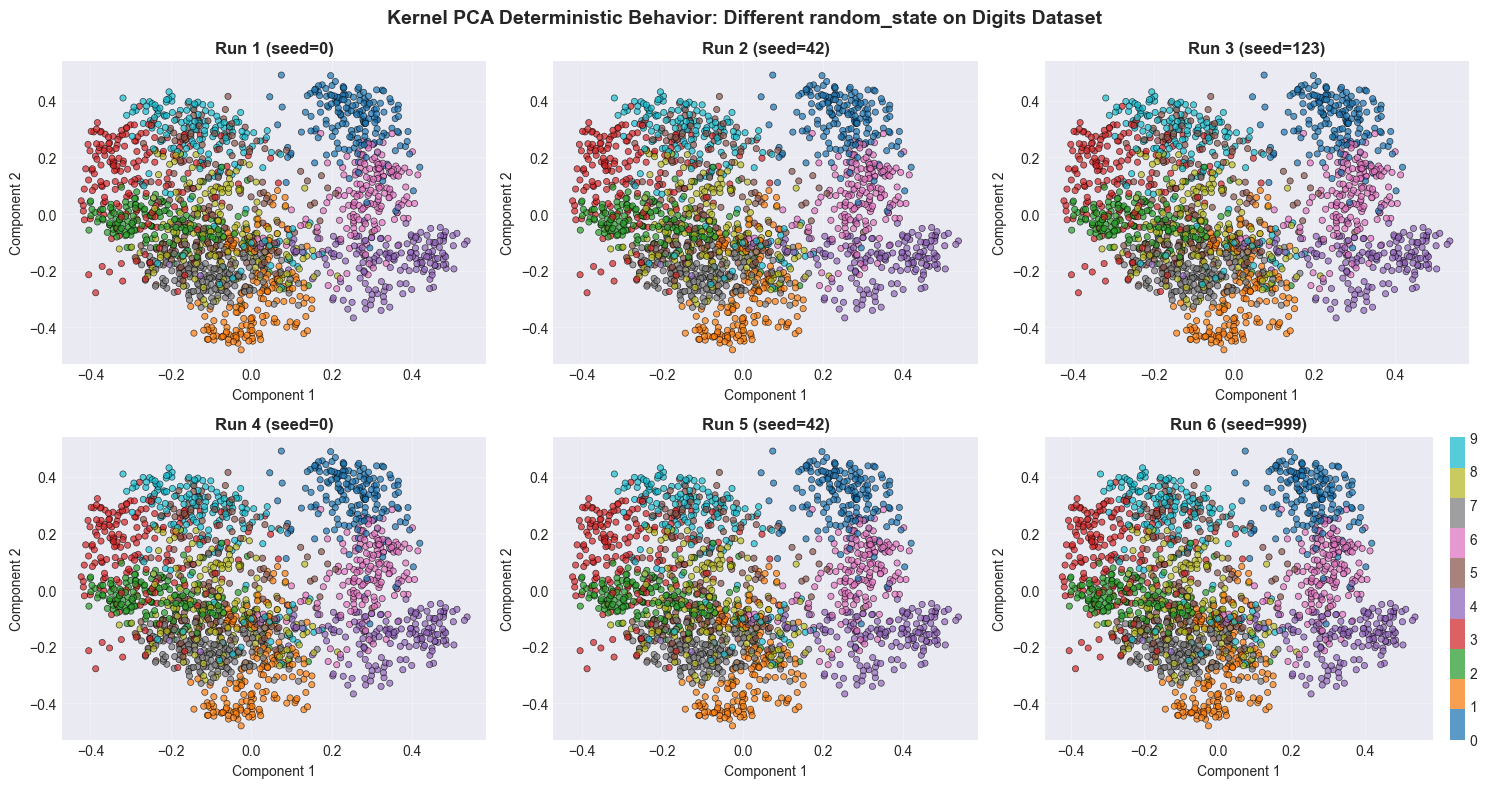

In [10]:
# Helper function for Kernel PCA with explicit random_state
def apply_kernel_pca_with_random_state(X, gamma, random_state):
    """Apply Kernel PCA with specific eigen_solver and random_state"""
    model = KernelPCA(n_components=2, kernel='rbf', gamma=gamma, 
                      eigen_solver='randomized', random_state=random_state)
    return model.fit_transform(X)

# Demonstrate that Kernel PCA is deterministic even with different random_state
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Kernel PCA Deterministic Behavior: Different random_state on Digits Dataset', 
             fontsize=14, fontweight='bold')

# Different random_state values (similar to t-SNE experiment)
random_states = [0, 42, 123, 0, 42, 999]
labels = [
    'Run 1 (seed=0)', 'Run 2 (seed=42)', 'Run 3 (seed=123)',
    'Run 4 (seed=0)', 'Run 5 (seed=42)', 'Run 6 (seed=999)'
]

# Store results to calculate differences
kpca_results = []

for idx, (rs, label) in enumerate(zip(random_states, labels)):
    i, j = idx // 3, idx % 3
    ax = axes[i, j]
    
    X_kpca = apply_kernel_pca_with_random_state(X_digits, gamma=0.01, random_state=rs)
    kpca_results.append(X_kpca)
    
    scatter = plot_reduction(ax, X_kpca, y_digits, label, cmap='tab10')
    
    # Add colorbar to last plot
    if idx == 5:
        plt.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04, ticks=range(10))

plt.tight_layout()
plt.show()


### 7.2 Quantitative Analysis: Maximum Differences Across All Datasets

In [11]:
# Prepare test datasets
test_datasets = [
    ('Circles', X_circles, y_circles, 1.0),
    ('Moons', X_moons, y_moons, 1.0),
    ('Swiss Roll', X_swiss, y_swiss, 0.1),
    ('Digits', X_digits, y_digits, 0.01)
]

# Store results for comprehensive table
results_data = []

for dataset_name, X, y, gamma in test_datasets:
    # Run Kernel PCA 3 times with DIFFERENT random_state
    kpca_runs = []
    random_states = [0, 42, 123]
    
    for rs in random_states:
        X_kpca = apply_kernel_pca_with_random_state(X, gamma=gamma, random_state=rs)
        kpca_runs.append(X_kpca)
    
    # Calculate maximum absolute difference between runs with DIFFERENT random_state
    max_diff_0_42 = np.max(np.abs(kpca_runs[0] - kpca_runs[1]))
    max_diff_42_123 = np.max(np.abs(kpca_runs[1] - kpca_runs[2]))
    max_diff_0_123 = np.max(np.abs(kpca_runs[0] - kpca_runs[2]))
    
    # Store for table
    results_data.append({
        'Dataset': dataset_name,
        'Gamma (γ)': gamma,
        'seed=0 Point[0]': f"({kpca_runs[0][0, 0]:.6f}, {kpca_runs[0][0, 1]:.6f})",
        'seed=42 Point[0]': f"({kpca_runs[1][0, 0]:.6f}, {kpca_runs[1][0, 1]:.6f})",
        'seed=123 Point[0]': f"({kpca_runs[2][0, 0]:.6f}, {kpca_runs[2][0, 1]:.6f})",
        'Max Diff (0 vs 42)': f"{max_diff_0_42:.2e}",
        'Max Diff (42 vs 123)': f"{max_diff_42_123:.2e}",
        'Max Diff (0 vs 123)': f"{max_diff_0_123:.2e}"
    })

# Create and display summary table
df_deterministic = pd.DataFrame(results_data)

# Display styled table
display(df_deterministic)

Dataset  Gamma (γ)         seed=0 Point[0]        seed=42 Point[0]  \
0     Circles       1.00   (-0.589161, 0.156638)   (-0.589161, 0.156638)   
1       Moons       1.00   (0.290171, -0.248880)   (0.290171, -0.248880)   
2  Swiss Roll       0.10  (-0.081843, -0.002391)  (-0.081843, -0.002391)   
3      Digits       0.01    (0.240867, 0.371786)    (0.240867, 0.371786)   

        seed=123 Point[0] Max Diff (0 vs 42) Max Diff (42 vs 123)  \
0   (-0.589161, 0.156638)           8.89e-13             8.10e-13   
1   (0.290171, -0.248880)           2.33e-15             2.66e-15   
2  (-0.081843, -0.002391)           3.16e-15             2.91e-15   
3    (0.240867, 0.371786)           2.27e-10             1.23e-10   

  Max Diff (0 vs 123)  
0            1.49e-13  
1            4.66e-15  
2            1.00e-15  
3            1.14e-10

## 8. Experiment 4: Local vs Global Structure Preservation

Demonstrate how t-SNE preserves **local neighborhoods** better than Kernel PCA

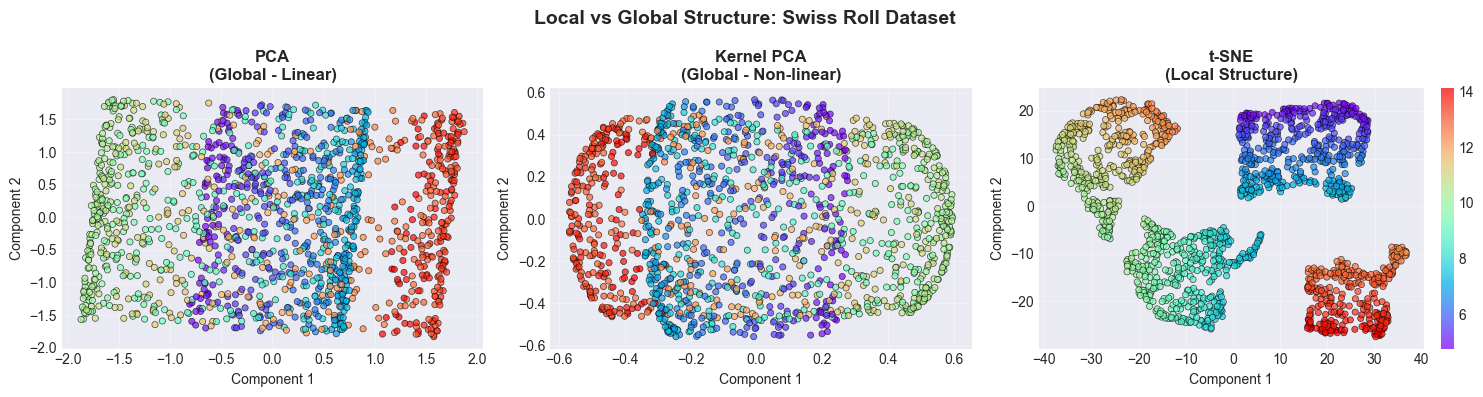

In [12]:
# Use Swiss Roll for clear demonstration
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Local vs Global Structure: Swiss Roll Dataset', 
             fontsize=14, fontweight='bold')

# PCA
X_pca = apply_dimensionality_reduction(X_swiss, y_swiss, 'pca')
plot_reduction(axes[0], X_pca, y_swiss, 
              'PCA\n(Global - Linear)', cmap='rainbow')

# Kernel PCA
X_kpca = apply_dimensionality_reduction(X_swiss, y_swiss, 'kernel_pca', gamma=0.1)
plot_reduction(axes[1], X_kpca, y_swiss, 
              'Kernel PCA\n(Global - Non-linear)', cmap='rainbow')

# t-SNE
X_tsne = apply_dimensionality_reduction(X_swiss, y_swiss, 'tsne', perplexity=50)
scatter = plot_reduction(axes[2], X_tsne, y_swiss, 
                        't-SNE\n(Local Structure)', cmap='rainbow')
plt.colorbar(scatter, ax=axes[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

## 9. Experiment 5: Interpretability

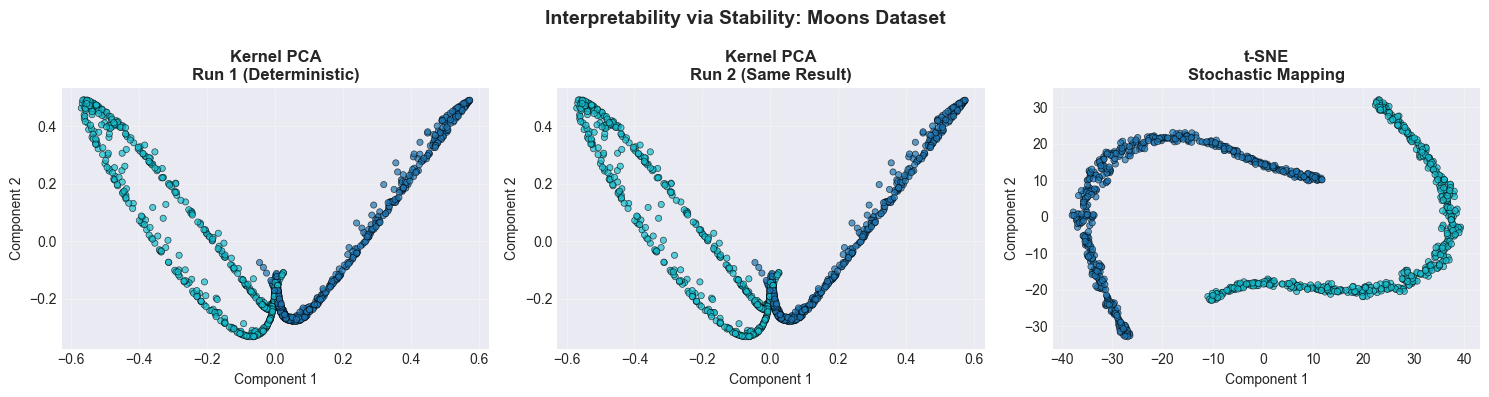

In [13]:
# Interpretability: Stability of embeddings (Moons)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Interpretability via Stability: Moons Dataset',
             fontsize=14, fontweight='bold')

# Kernel PCA (deterministic)
X_kpca_1 = apply_dimensionality_reduction(X_moons, y_moons, 'kernel_pca', gamma=5)
plot_reduction(axes[0], X_kpca_1, y_moons,
              'Kernel PCA\nRun 1 (Deterministic)')

X_kpca_2 = apply_dimensionality_reduction(X_moons, y_moons, 'kernel_pca', gamma=5)
plot_reduction(axes[1], X_kpca_2, y_moons,
              'Kernel PCA\nRun 2 (Same Result)')

# t-SNE (stochastic)
X_tsne = apply_dimensionality_reduction(
    X_moons, y_moons, 'tsne', perplexity=30, random_state=0
)
plot_reduction(axes[2], X_tsne, y_moons,
              't-SNE\nStochastic Mapping')

plt.tight_layout()
plt.show()


# 10. Experiment 6: Hyperparameter Tuning in t-SNE

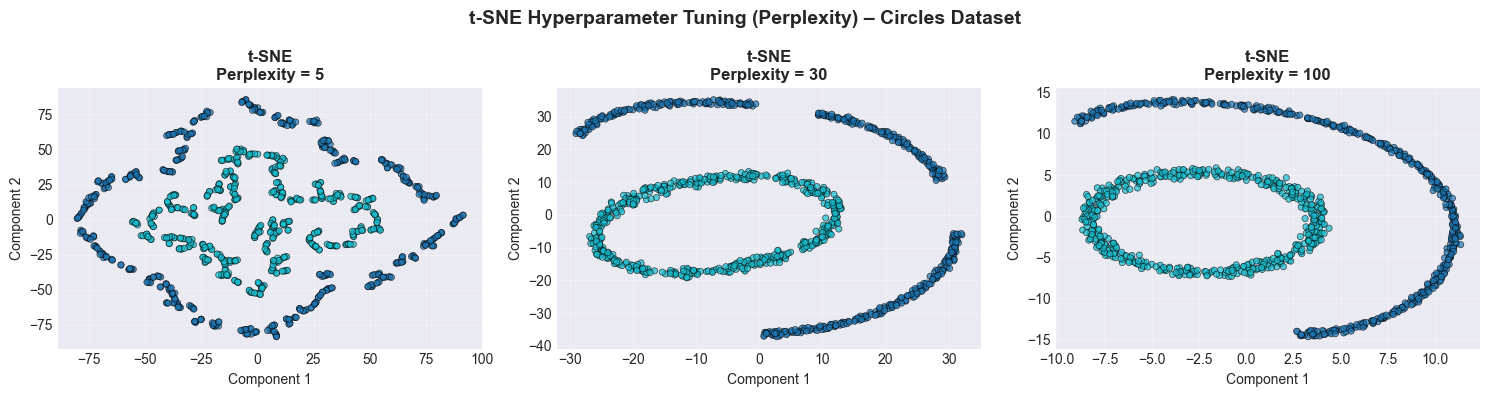

In [14]:
# Hyperparameter tuning: t-SNE perplexity (Circles)
perplexities = [5, 30, 100]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('t-SNE Hyperparameter Tuning (Perplexity) – Circles Dataset',
             fontsize=14, fontweight='bold')

for ax, perp in zip(axes, perplexities):
    X_tsne = apply_dimensionality_reduction(
        X_circles, y_circles, 'tsne', perplexity=perp
    )
    plot_reduction(
        ax, X_tsne, y_circles,
        f't-SNE\nPerplexity = {perp}'
    )

plt.tight_layout()
plt.show()


# 11. Limitations and Considerations

### 11.1 Limitations: Global distances and cluster layouts are not reproducible in t-SNE.

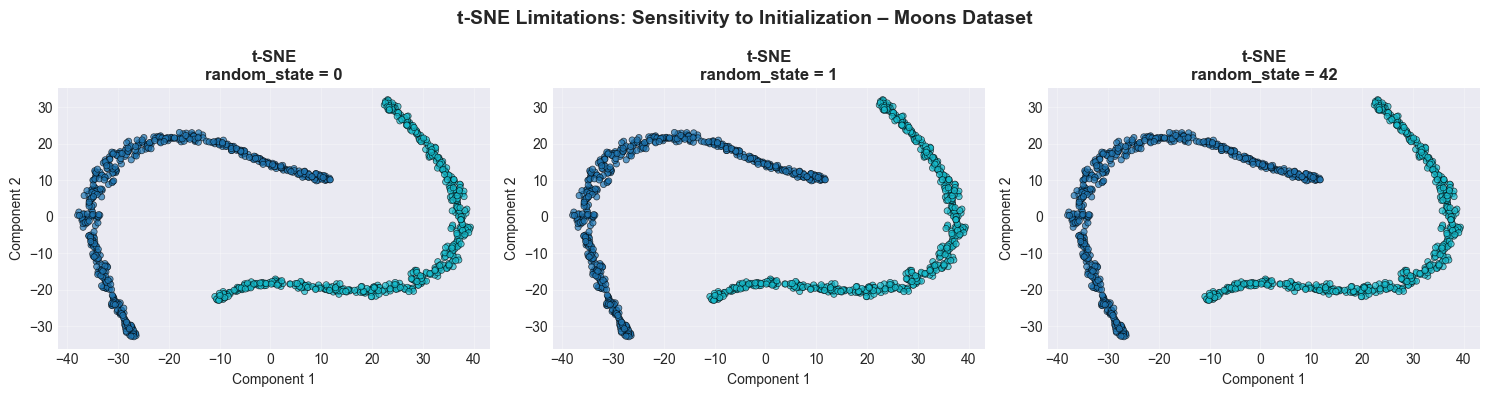

In [15]:
# Limitations: Sensitivity to random_state (Moons)
seeds = [0, 1, 42]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('t-SNE Limitations: Sensitivity to Initialization – Moons Dataset',
             fontsize=14, fontweight='bold')

for ax, seed in zip(axes, seeds):
    X_tsne = apply_dimensionality_reduction(
        X_moons, y_moons, 'tsne',
        perplexity=30,
        random_state=seed
    )
    plot_reduction(
        ax, X_tsne, y_moons,
        f't-SNE\nrandom_state = {seed}'
    )

plt.tight_layout()
plt.show()


### 11.2 Considerations

#### 11.2.1: Stability Across Multiple Runs

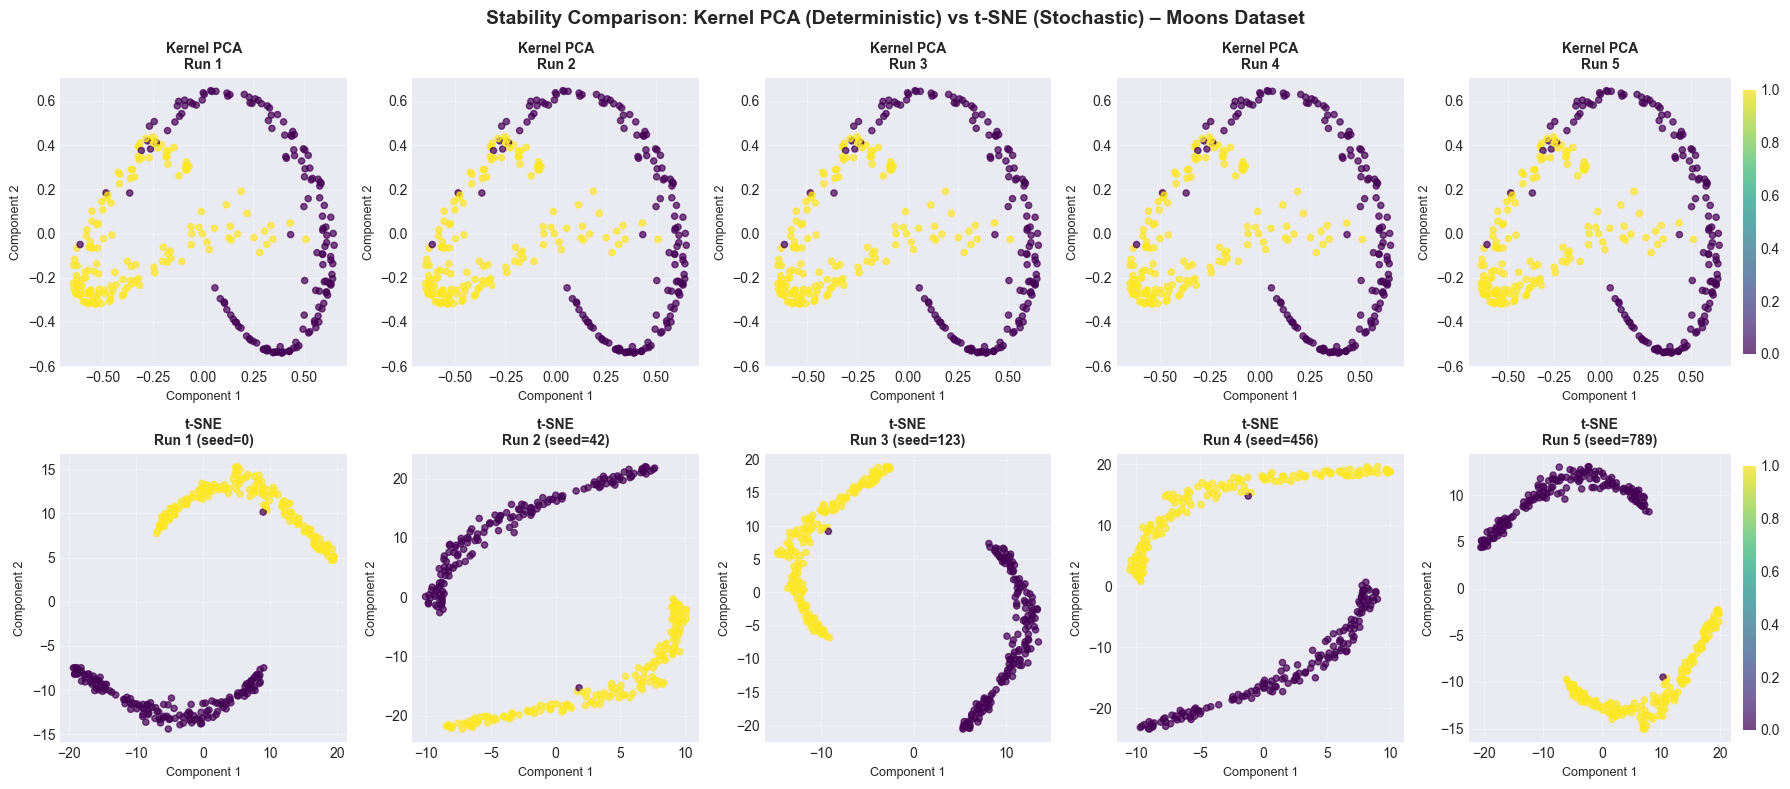


QUANTITATIVE STABILITY ANALYSIS

1. KERNEL PCA (Expected: Near-zero differences)
--------------------------------------------------------------------------------
   Run 1 vs Run 2: Max difference = 0.00e+00
   Run 1 vs Run 3: Max difference = 0.00e+00
   Run 1 vs Run 4: Max difference = 0.00e+00
   Run 1 vs Run 5: Max difference = 0.00e+00
   Run 2 vs Run 3: Max difference = 0.00e+00
   Run 2 vs Run 4: Max difference = 0.00e+00
   Run 2 vs Run 5: Max difference = 0.00e+00
   Run 3 vs Run 4: Max difference = 0.00e+00
   Run 3 vs Run 5: Max difference = 0.00e+00
   Run 4 vs Run 5: Max difference = 0.00e+00

   Average max difference: 0.00e+00
   Standard deviation:     0.00e+00
   ✓ Status: PASS (deterministic)

2. t-SNE (Expected: Significant differences)
--------------------------------------------------------------------------------
   Run 1 vs Run 2:
      Raw max difference:     3.13e+01
      Aligned max difference: 8.32e-03
      Procrustes disparity:   0.0120
   Run 1 vs Run 3:


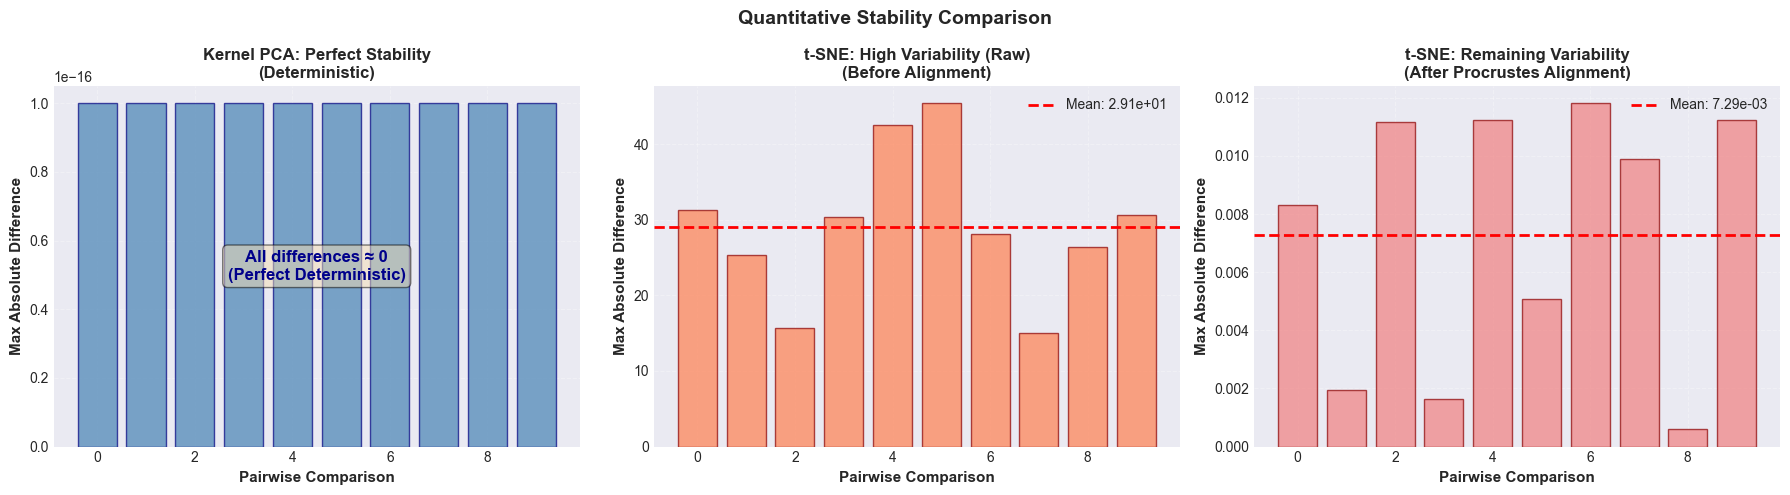


SAMPLE POINT COMPARISON (First 5 points)

Kernel PCA - First 5 points from Run 1:
[[-0.57436894 -0.31733104]
 [-0.33298477 -0.21236156]
 [ 0.06318724  0.64323794]
 [-0.6367008  -0.26478703]
 [-0.64699731 -0.14322864]]

Kernel PCA - First 5 points from Run 2:
[[-0.57436894 -0.31733104]
 [-0.33298477 -0.21236156]
 [ 0.06318724  0.64323794]
 [-0.6367008  -0.26478703]
 [-0.64699731 -0.14322864]]

Max difference: 0.00e+00

--------------------------------------------------------------------------------

t-SNE - First 5 points from Run 1 (seed=0):
[[  5.5145493  13.839838 ]
 [ -0.510556   12.718043 ]
 [  5.736709  -10.260224 ]
 [  7.466203   12.598269 ]
 [  9.005773   10.998703 ]]

t-SNE - First 5 points from Run 2 (seed=42):
[[  6.7778597 -14.291282 ]
 [  9.218773   -8.554719 ]
 [ -8.950326    1.7625633]
 [  4.655656  -15.347458 ]
 [  2.4755342 -15.831192 ]]

Max difference (raw): 2.81e+01



In [20]:
from scipy.spatial import procrustes

print("="*80)
print("STABILITY COMPARISON: KERNEL PCA vs t-SNE")
print("="*80)
print("\nObjective: Demonstrate deterministic vs stochastic behavior")
print("- Kernel PCA: Should produce IDENTICAL results (deterministic)")
print("- t-SNE: Should produce DIFFERENT results (stochastic)")
print("="*80)

n_runs = 5
random_seeds = [0, 42, 123, 456, 789]

# Use the EXISTING X_moons, y_moons from Section 2 (already standardized)
print(f"\nUsing existing Moons dataset: {X_moons.shape}")
print(f"Number of runs: {n_runs}")
print(f"Random seeds for t-SNE: {random_seeds}")


fig = plt.figure(figsize=(18, 8))
fig.suptitle('Stability Comparison: Kernel PCA (Deterministic) vs t-SNE (Stochastic) – Moons Dataset',
             fontsize=14, fontweight='bold')

kpca_results = []
tsne_results = []

# Row 1: Kernel PCA (should be identical across all runs)
print("\n" + "-"*80)
print("Running Kernel PCA (5 times with same parameters)...")
print("-"*80)

for i in range(n_runs):
    ax = plt.subplot(2, n_runs, i + 1)
    
    # Kernel PCA with SAME random_state (deterministic)
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1.0, random_state=42)
    X_kpca = kpca.fit_transform(X_moons)
    kpca_results.append(X_kpca.copy())
    
    scatter = ax.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_moons, cmap='viridis', s=20, alpha=0.7)
    ax.set_title(f'Kernel PCA\nRun {i+1}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Component 1', fontsize=9)
    ax.set_ylabel('Component 2', fontsize=9)
    ax.grid(True, alpha=0.3)
    
    if i == n_runs - 1:
        plt.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

# Row 2: t-SNE (should be different with different random_state)
print("\nRunning t-SNE (5 times with DIFFERENT random_state)...")
print("-"*80)

for i in range(n_runs):
    ax = plt.subplot(2, n_runs, n_runs + i + 1)
    
    # t-SNE with DIFFERENT random_state (stochastic)
    tsne = TSNE(
        n_components=2,
        perplexity=30,
        random_state=random_seeds[i],  # KEY: Different seed each time
        max_iter=1000,  # ← FIXED: Changed from n_iter to max_iter
        learning_rate='auto',
        init='random'
    )
    X_tsne = tsne.fit_transform(X_moons)
    tsne_results.append(X_tsne.copy())
    
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_moons, cmap='viridis', s=20, alpha=0.7)
    ax.set_title(f't-SNE\nRun {i+1} (seed={random_seeds[i]})', fontsize=10, fontweight='bold')
    ax.set_xlabel('Component 1', fontsize=9)
    ax.set_ylabel('Component 2', fontsize=9)
    ax.grid(True, alpha=0.3)
    
    if i == n_runs - 1:
        plt.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("QUANTITATIVE STABILITY ANALYSIS")
print("="*80)

# Kernel PCA stability
print("\n1. KERNEL PCA (Expected: Near-zero differences)")
print("-" * 80)
kpca_diffs = []
for i in range(len(kpca_results) - 1):
    for j in range(i + 1, len(kpca_results)):
        diff = np.max(np.abs(kpca_results[i] - kpca_results[j]))
        kpca_diffs.append(diff)
        print(f"   Run {i+1} vs Run {j+1}: Max difference = {diff:.2e}")

kpca_mean = np.mean(kpca_diffs) if len(kpca_diffs) > 0 else 0
kpca_std = np.std(kpca_diffs) if len(kpca_diffs) > 0 else 0
print(f"\n   Average max difference: {kpca_mean:.2e}")
print(f"   Standard deviation:     {kpca_std:.2e}")
print(f"   ✓ Status: {'PASS' if kpca_mean < 1e-10 else 'FAIL'} (deterministic)")

# t-SNE variability
print("\n2. t-SNE (Expected: Significant differences)")
print("-" * 80)

tsne_diffs_raw = []
tsne_diffs_aligned = []
tsne_disparities = []

for i in range(len(tsne_results) - 1):
    for j in range(i + 1, len(tsne_results)):
        # Raw difference (without alignment)
        diff_raw = np.max(np.abs(tsne_results[i] - tsne_results[j]))
        tsne_diffs_raw.append(diff_raw)
        
        # Difference after Procrustes alignment
        mtx1_aligned, mtx2_aligned, disparity = procrustes(tsne_results[i], tsne_results[j])
        diff_aligned = np.max(np.abs(mtx1_aligned - mtx2_aligned))
        tsne_diffs_aligned.append(diff_aligned)
        tsne_disparities.append(disparity)
        
        print(f"   Run {i+1} vs Run {j+1}:")
        print(f"      Raw max difference:     {diff_raw:.2e}")
        print(f"      Aligned max difference: {diff_aligned:.2e}")
        print(f"      Procrustes disparity:   {disparity:.4f}")

tsne_raw_mean = np.mean(tsne_diffs_raw) if len(tsne_diffs_raw) > 0 else 0
tsne_aligned_mean = np.mean(tsne_diffs_aligned) if len(tsne_diffs_aligned) > 0 else 0
tsne_disparity_mean = np.mean(tsne_disparities) if len(tsne_disparities) > 0 else 0

print(f"\n   Average raw difference:     {tsne_raw_mean:.2e}")
print(f"   Average aligned difference: {tsne_aligned_mean:.2e}")
print(f"   Average Procrustes disparity: {tsne_disparity_mean:.4f}")
print(f"   ✓ Status: {'PASS' if tsne_raw_mean > 1.0 else 'FAIL'} (stochastic)")

# Summary comparison
print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"Kernel PCA variability:           {kpca_mean:.2e} ± {kpca_std:.2e}")
print(f"t-SNE variability (raw):          {tsne_raw_mean:.2e} ± {np.std(tsne_diffs_raw):.2e}")
print(f"t-SNE variability (aligned):      {tsne_aligned_mean:.2e} ± {np.std(tsne_diffs_aligned):.2e}")

# Calculate ratios safely
if kpca_mean > 1e-15:
    ratio_raw = tsne_raw_mean / kpca_mean
    ratio_aligned = tsne_aligned_mean / kpca_mean
else:
    ratio_raw = tsne_raw_mean / 1e-15
    ratio_aligned = tsne_aligned_mean / 1e-15

print(f"\nVariability ratio (raw t-SNE / Kernel PCA):     {ratio_raw:.2e}x")
print(f"Variability ratio (aligned t-SNE / Kernel PCA): {ratio_aligned:.2e}x")

# Final verdict
print("\n" + "="*80)
print("CONCLUSION")
print("="*80)
if tsne_raw_mean > 1.0 and kpca_mean < 1e-10:
    print("CORRECT: Kernel PCA is DETERMINISTIC, t-SNE is STOCHASTIC")
else:
    print("WARNING: Unexpected behavior detected!")
    if tsne_raw_mean <= 1.0:
        print("  - t-SNE results are too similar (check random_state)")
    if kpca_mean >= 1e-10:
        print("  - Kernel PCA results are not identical (unexpected)")
print("="*80)


fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Quantitative Stability Comparison', fontsize=14, fontweight='bold')

# Kernel PCA differences
ax = axes[0]
if len(kpca_diffs) > 0 and kpca_mean > 1e-15:
    ax.bar(range(len(kpca_diffs)), kpca_diffs, color='steelblue', alpha=0.7, edgecolor='navy')
    ax.axhline(y=kpca_mean, color='red', linestyle='--', linewidth=2,
               label=f'Mean: {kpca_mean:.2e}')
    ax.set_yscale('log')
    ax.legend(fontsize=10)
else:
    ax.bar(range(max(len(kpca_diffs), 1)), [1e-16]*max(len(kpca_diffs), 1), 
           color='steelblue', alpha=0.7, edgecolor='navy')
    ax.text(0.5, 0.5, 'All differences ≈ 0\n(Perfect Deterministic)', 
            transform=ax.transAxes, ha='center', va='center', 
            fontsize=12, fontweight='bold', color='darkblue',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax.set_xlabel('Pairwise Comparison', fontsize=11, fontweight='bold')
ax.set_ylabel('Max Absolute Difference', fontsize=11, fontweight='bold')
ax.set_title('Kernel PCA: Perfect Stability\n(Deterministic)', fontweight='bold', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')

# t-SNE differences (raw)
ax = axes[1]
if len(tsne_diffs_raw) > 0:
    ax.bar(range(len(tsne_diffs_raw)), tsne_diffs_raw, color='coral', alpha=0.7, edgecolor='darkred')
    ax.axhline(y=tsne_raw_mean, color='red', linestyle='--', linewidth=2,
               label=f'Mean: {tsne_raw_mean:.2e}')
    ax.legend(fontsize=10)
ax.set_xlabel('Pairwise Comparison', fontsize=11, fontweight='bold')
ax.set_ylabel('Max Absolute Difference', fontsize=11, fontweight='bold')
ax.set_title('t-SNE: High Variability (Raw)\n(Before Alignment)', fontweight='bold', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')

# t-SNE differences (aligned)
ax = axes[2]
if len(tsne_diffs_aligned) > 0:
    ax.bar(range(len(tsne_diffs_aligned)), tsne_diffs_aligned, color='lightcoral', alpha=0.7, edgecolor='darkred')
    ax.axhline(y=tsne_aligned_mean, color='red', linestyle='--', linewidth=2,
               label=f'Mean: {tsne_aligned_mean:.2e}')
    ax.legend(fontsize=10)
ax.set_xlabel('Pairwise Comparison', fontsize=11, fontweight='bold')
ax.set_ylabel('Max Absolute Difference', fontsize=11, fontweight='bold')
ax.set_title('t-SNE: Remaining Variability\n(After Procrustes Alignment)', fontweight='bold', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


print("\n" + "="*80)
print("SAMPLE POINT COMPARISON (First 5 points)")
print("="*80)

print("\nKernel PCA - First 5 points from Run 1:")
print(kpca_results[0][:5])
print("\nKernel PCA - First 5 points from Run 2:")
print(kpca_results[1][:5])
print(f"\nMax difference: {np.max(np.abs(kpca_results[0][:5] - kpca_results[1][:5])):.2e}")

print("\n" + "-"*80)
print(f"\nt-SNE - First 5 points from Run 1 (seed={random_seeds[0]}):")
print(tsne_results[0][:5])
print(f"\nt-SNE - First 5 points from Run 2 (seed={random_seeds[1]}):")
print(tsne_results[1][:5])
print(f"\nMax difference (raw): {np.max(np.abs(tsne_results[0][:5] - tsne_results[1][:5])):.2e}")

print("\n" + "="*80)

#### 11.2.2: Effect of PCA Preprocessing
Reduce noise before t-SNE

EFFECT OF PCA PREPROCESSING ON t-SNE

Objective: Compare t-SNE performance with and without PCA preprocessing

Benefits of PCA preprocessing:
  1. Noise reduction (remove irrelevant dimensions)
  2. Faster computation (fewer dimensions)
  3. Better cluster separation (focus on principal variance)

Configuration:
  - Original dimensions: 64
  - PCA components: 50
  - t-SNE perplexity: 30
  - Random state: 42

--------------------------------------------------------------------------------
STEP 1: Applying PCA preprocessing...
--------------------------------------------------------------------------------
PCA reduced dimensions: 64 → 50
Total explained variance: 98.28%

--------------------------------------------------------------------------------
STEP 2: Applying t-SNE...
--------------------------------------------------------------------------------

[1/2] Running t-SNE on raw data (64D)...
      Time: 4.83s | KL divergence: 0.8369

[2/2] Running t-SNE on PCA-reduced data (50D)...


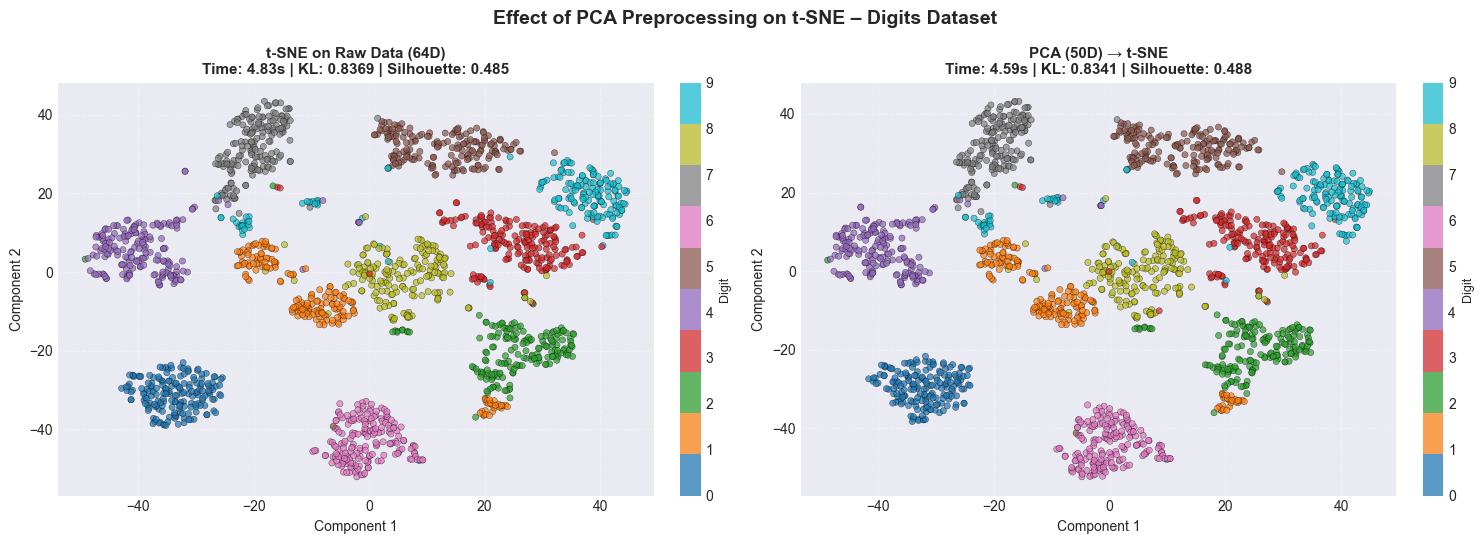

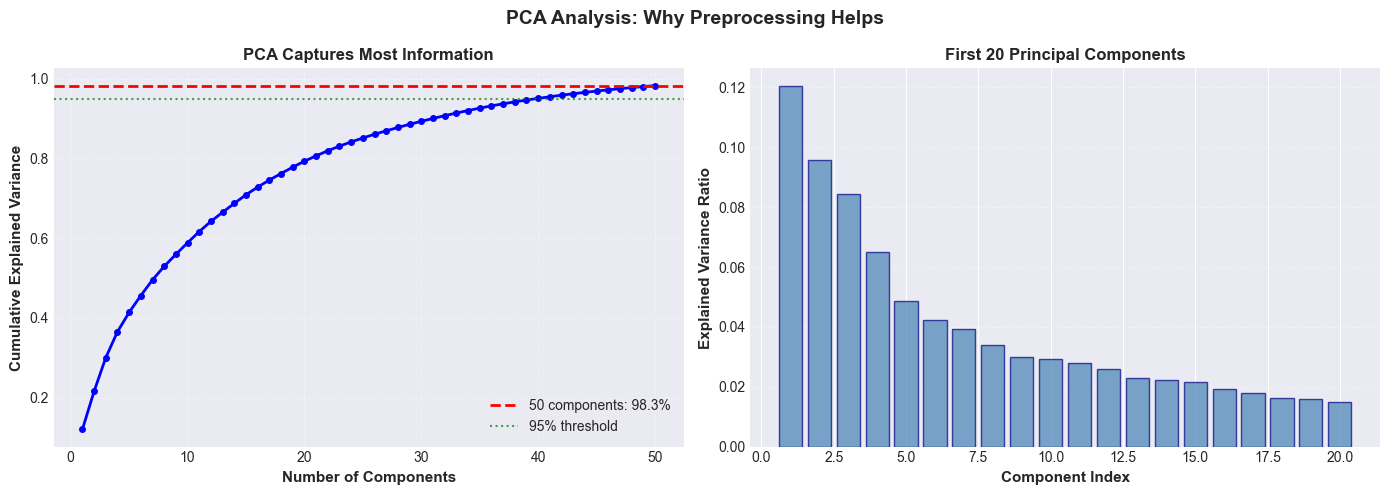


CONCLUSION
✓ RECOMMENDATION: Use PCA preprocessing before t-SNE
  - 1.1x faster computation
  - Equal or better cluster quality (Silhouette: 0.488 vs 0.485)
  - Noise reduction (98.3% variance retained)

Key Takeaways:
  1. PCA removes noise by focusing on principal variance
  2. Dimensionality reduction speeds up t-SNE computation
  3. For high-dimensional data (>50D), PCA preprocessing is recommended
  4. Use 30-50 components to retain ~90-95% variance


In [ ]:
print("="*80)
print("EFFECT OF PCA PREPROCESSING ON t-SNE")
print("="*80)
print("\nObjective: Compare t-SNE performance with and without PCA preprocessing")
print("\nBenefits of PCA preprocessing:")
print("  1. Noise reduction (remove irrelevant dimensions)")
print("  2. Faster computation (fewer dimensions)")
print("  3. Better cluster separation (focus on principal variance)")
print("="*80)


# PCA preprocessing
n_pca_components = 50
perplexity = 30
random_state = 42

print(f"\nConfiguration:")
print(f"  - Original dimensions: {X_digits.shape[1]}")
print(f"  - PCA components: {n_pca_components}")
print(f"  - t-SNE perplexity: {perplexity}")
print(f"  - Random state: {random_state}")


print("\n" + "-"*80)
print("STEP 1: Applying PCA preprocessing...")
print("-"*80)

pca = PCA(n_components=n_pca_components, random_state=random_state)
X_pca_50 = pca.fit_transform(X_digits)

explained_variance = pca.explained_variance_ratio_.sum()
print(f"PCA reduced dimensions: {X_digits.shape[1]} → {X_pca_50.shape[1]}")
print(f"Total explained variance: {explained_variance:.2%}")


print("\n" + "-"*80)
print("STEP 2: Applying t-SNE...")
print("-"*80)

import time

# t-SNE without PCA (on raw data)
print("\n[1/2] Running t-SNE on raw data (64D)...")
start_time = time.time()
tsne_raw = TSNE(n_components=2, perplexity=perplexity, random_state=random_state, 
                max_iter=1000, n_jobs=-1)
X_tsne_raw = tsne_raw.fit_transform(X_digits)
time_raw = time.time() - start_time
print(f"      Time: {time_raw:.2f}s | KL divergence: {tsne_raw.kl_divergence_:.4f}")

# t-SNE with PCA preprocessing (on 50D)
print("\n[2/2] Running t-SNE on PCA-reduced data (50D)...")
start_time = time.time()
tsne_pca = TSNE(n_components=2, perplexity=perplexity, random_state=random_state, 
                max_iter=1000, n_jobs=-1)
X_tsne_pca = tsne_pca.fit_transform(X_pca_50)
time_pca = time.time() - start_time
print(f"      Time: {time_pca:.2f}s | KL divergence: {tsne_pca.kl_divergence_:.4f}")


print("\n" + "-"*80)
print("STEP 3: Computing quality metrics...")
print("-"*80)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score

# Silhouette Score (higher is better, range [-1, 1])
silhouette_raw = silhouette_score(X_tsne_raw, y_digits)
silhouette_pca = silhouette_score(X_tsne_pca, y_digits)

# k-NN accuracy (measure cluster quality)
knn_raw = KNeighborsClassifier(n_neighbors=5).fit(X_tsne_raw, y_digits)
knn_pca = KNeighborsClassifier(n_neighbors=5).fit(X_tsne_pca, y_digits)

from sklearn.model_selection import cross_val_score
knn_acc_raw = cross_val_score(knn_raw, X_tsne_raw, y_digits, cv=5).mean()
knn_acc_pca = cross_val_score(knn_pca, X_tsne_pca, y_digits, cv=5).mean()

print(f"\nQuality Metrics:")
print(f"  {'Metric':<25} {'Raw (64D)':<15} {'PCA+t-SNE (50D)':<15} {'Winner'}")
print(f"  {'-'*25} {'-'*15} {'-'*15} {'-'*10}")
print(f"  {'Computation Time (s)':<25} {time_raw:<15.2f} {time_pca:<15.2f} {'PCA' if time_pca < time_raw else 'Raw'}")
print(f"  {'KL Divergence (lower)':<25} {tsne_raw.kl_divergence_:<15.4f} {tsne_pca.kl_divergence_:<15.4f} {'PCA' if tsne_pca.kl_divergence_ < tsne_raw.kl_divergence_ else 'Raw'}")
print(f"  {'Silhouette Score':<25} {silhouette_raw:<15.4f} {silhouette_pca:<15.4f} {'PCA' if silhouette_pca > silhouette_raw else 'Raw'}")
print(f"  {'5-NN Accuracy':<25} {knn_acc_raw:<15.4f} {knn_acc_pca:<15.4f} {'PCA' if knn_acc_pca > knn_acc_raw else 'Raw'}")

# Speed improvement
speedup = time_raw / time_pca
print(f"\n  → Speedup: {speedup:.2f}x faster with PCA preprocessing")


print("\n" + "-"*80)
print("STEP 4: Creating visualizations...")
print("-"*80)

fig, axes = plt.subplots(1, 2, figsize=(15, 5.5))
fig.suptitle('Effect of PCA Preprocessing on t-SNE – Digits Dataset', 
             fontsize=14, fontweight='bold')

# Plot 1: t-SNE without PCA
ax = axes[0]
scatter1 = ax.scatter(X_tsne_raw[:, 0], X_tsne_raw[:, 1], 
                      c=y_digits, cmap='tab10', s=20, alpha=0.7, 
                      edgecolors='k', linewidth=0.3)
ax.set_title(f't-SNE on Raw Data (64D)\n' + 
             f'Time: {time_raw:.2f}s | KL: {tsne_raw.kl_divergence_:.4f} | Silhouette: {silhouette_raw:.3f}',
             fontsize=11, fontweight='bold')
ax.set_xlabel('Component 1', fontsize=10)
ax.set_ylabel('Component 2', fontsize=10)
ax.grid(True, alpha=0.3, linestyle='--')

# Add colorbar for plot 1
cbar1 = plt.colorbar(scatter1, ax=ax, fraction=0.046, pad=0.04, ticks=range(10))
cbar1.set_label('Digit', fontsize=9)

# Plot 2: t-SNE with PCA
ax = axes[1]
scatter2 = ax.scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1], 
                      c=y_digits, cmap='tab10', s=20, alpha=0.7, 
                      edgecolors='k', linewidth=0.3)
ax.set_title(f'PCA (50D) → t-SNE\n' + 
             f'Time: {time_pca:.2f}s | KL: {tsne_pca.kl_divergence_:.4f} | Silhouette: {silhouette_pca:.3f}',
             fontsize=11, fontweight='bold')
ax.set_xlabel('Component 1', fontsize=10)
ax.set_ylabel('Component 2', fontsize=10)
ax.grid(True, alpha=0.3, linestyle='--')

# Add colorbar for plot 2
cbar2 = plt.colorbar(scatter2, ax=ax, fraction=0.046, pad=0.04, ticks=range(10))
cbar2.set_label('Digit', fontsize=9)

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('PCA Analysis: Why Preprocessing Helps', fontsize=14, fontweight='bold')

# Plot 1: Cumulative explained variance
ax = axes[0]
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
ax.plot(range(1, n_pca_components + 1), cumulative_variance, 
        'b-', linewidth=2, marker='o', markersize=4)
ax.axhline(y=explained_variance, color='r', linestyle='--', linewidth=2,
           label=f'{n_pca_components} components: {explained_variance:.1%}')
ax.axhline(y=0.95, color='g', linestyle=':', linewidth=1.5, alpha=0.7,
           label='95% threshold')
ax.set_xlabel('Number of Components', fontsize=11, fontweight='bold')
ax.set_ylabel('Cumulative Explained Variance', fontsize=11, fontweight='bold')
ax.set_title('PCA Captures Most Information', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, linestyle='--')

# Plot 2: Individual variance per component (first 20)
ax = axes[1]
ax.bar(range(1, 21), pca.explained_variance_ratio_[:20], 
       color='steelblue', alpha=0.7, edgecolor='navy')
ax.set_xlabel('Component Index', fontsize=11, fontweight='bold')
ax.set_ylabel('Explained Variance Ratio', fontsize=11, fontweight='bold')
ax.set_title('First 20 Principal Components', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--', axis='y')

plt.tight_layout()
plt.show()


print("\n" + "="*80)
print("CONCLUSION")
print("="*80)

if time_pca < time_raw and silhouette_pca >= silhouette_raw:
    print("✓ RECOMMENDATION: Use PCA preprocessing before t-SNE")
    print(f"  - {speedup:.1f}x faster computation")
    print(f"  - Equal or better cluster quality (Silhouette: {silhouette_pca:.3f} vs {silhouette_raw:.3f})")
    print(f"  - Noise reduction ({explained_variance:.1%} variance retained)")
elif silhouette_pca > silhouette_raw:
    print("✓ PCA preprocessing improves cluster quality")
    print(f"  - Better separation (Silhouette: {silhouette_pca:.3f} vs {silhouette_raw:.3f})")
else:
    print("⚠ Results are mixed - consider dataset characteristics")

print("\nKey Takeaways:")
print("  1. PCA removes noise by focusing on principal variance")
print("  2. Dimensionality reduction speeds up t-SNE computation")
print("  3. For high-dimensional data (>50D), PCA preprocessing is recommended")
print("  4. Use 30-50 components to retain ~90-95% variance")
print("="*80)

# 11. Combining PCA and t-SNE


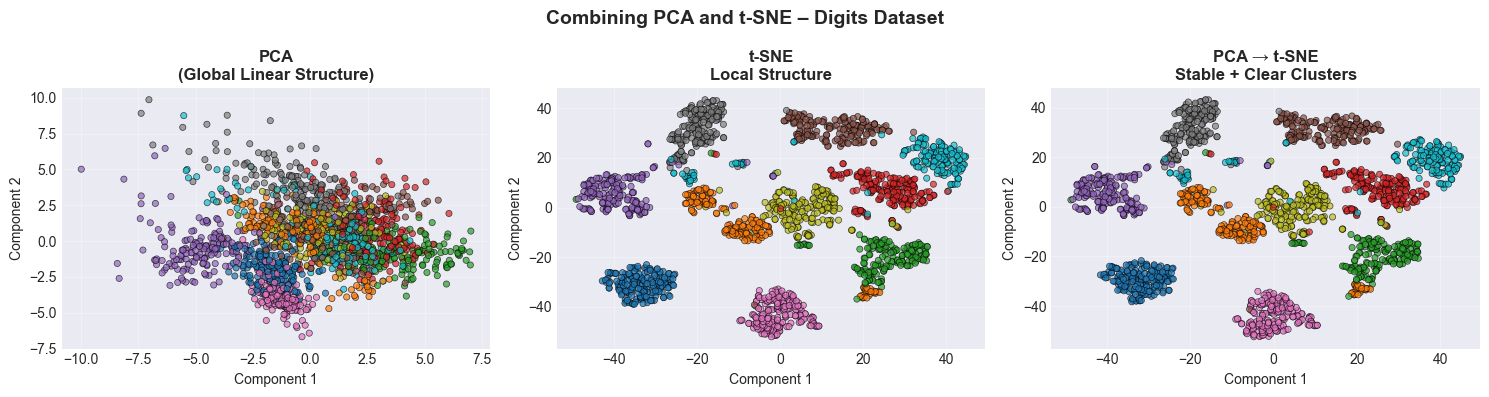

In [17]:
# Combining PCA and t-SNE: Digits dataset
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Combining PCA and t-SNE – Digits Dataset',
             fontsize=14, fontweight='bold')

# PCA only
X_pca = apply_dimensionality_reduction(X_digits, y_digits, 'pca')
plot_reduction(axes[0], X_pca, y_digits,
              'PCA\n(Global Linear Structure)')

# t-SNE only
X_tsne = apply_dimensionality_reduction(X_digits, y_digits, 'tsne', perplexity=30)
plot_reduction(axes[1], X_tsne, y_digits,
              't-SNE\nLocal Structure')

# PCA → t-SNE
X_digits_pca50 = PCA(n_components=50, random_state=42).fit_transform(X_digits)
X_pca_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_digits_pca50)
plot_reduction(axes[2], X_pca_tsne, y_digits,
              'PCA → t-SNE\nStable + Clear Clusters')

plt.tight_layout()
plt.show()
